In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import warnings
from sklearn.preprocessing import OneHotEncoder

warnings.filterwarnings('ignore')
plt.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv('./movies.csv')

In [3]:
df.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


### Descriptive statistics

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [5]:
# Number of unique values for each col
df.nunique()

name        7512
rating        12
genre         19
year          41
released    3414
score         72
votes        936
director    2949
writer      4535
star        2814
country       59
budget       413
gross       7472
company     2385
runtime      138
dtype: int64

In [6]:
# Removing continues data 
df = df.drop(labels =['released', 'company' ] , axis=1)

In [7]:
df.shape

(7668, 13)

In [8]:
df.head(5)

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,runtime
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,146.0
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,124.0
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,88.0
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,98.0


In [9]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [10]:
df.isna().sum()

name           0
rating        77
genre          0
year           0
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
runtime        4
dtype: int64

In [11]:
# Fill n/a values for numerical data with colomn mean 
df['score'].fillna(value=df['score'].mean() , inplace=True)
df['gross'].fillna(value=df['gross'].mean() , inplace=True)

# Fill n/a values for categorical data with 'unknown' word
df['rating'].fillna(value='unrated' , inplace=True)
df['writer'].fillna(value='unknown' , inplace=True)
df['star'].fillna(value='unknown' , inplace=True)
df['country'].fillna(value='unknown' , inplace=True)

# Delete lines with missing information 
df.dropna(subset=['votes'] , axis=0 , inplace=True)
df.dropna(subset=['budget'] , axis=0 , inplace=True)
df.dropna(subset=['runtime'] , axis=0 ,inplace=True)

In [12]:
# Check for duplicates
df.drop_duplicates(keep='first',inplace=True)

In [13]:
df.shape

(5492, 13)

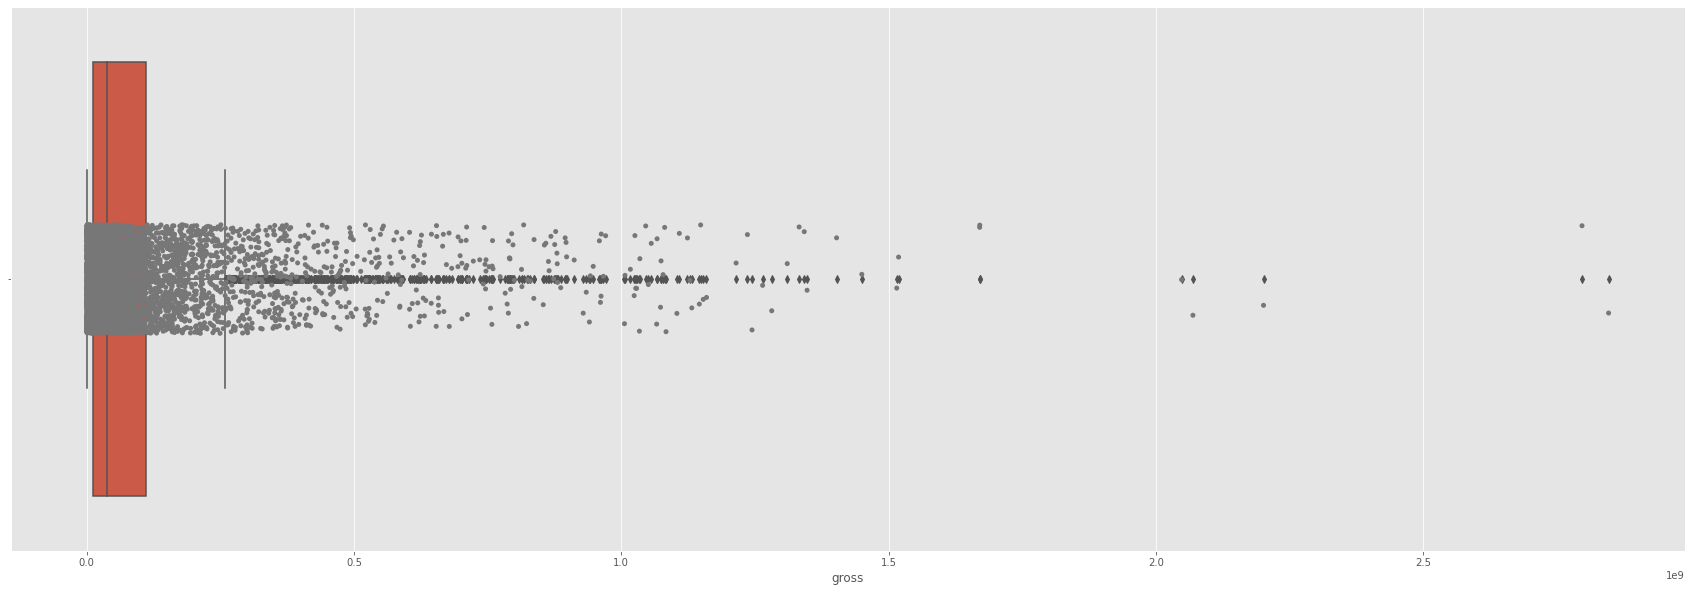

In [14]:
#Outliers detection for numerical variable 'gross'
plt.figure(figsize=(30,10))

sns.boxplot(x='gross' , data=df)
sns.stripplot( x='gross',data=df, color="#777777")

In [15]:
# Dropping gross values which is bigger than 2e9
outliers_indices = df.loc[df['gross']>2e9].index
df.drop(outliers_indices , inplace=True)

In [16]:
# Was (5492, 15)
df.shape

(5487, 13)

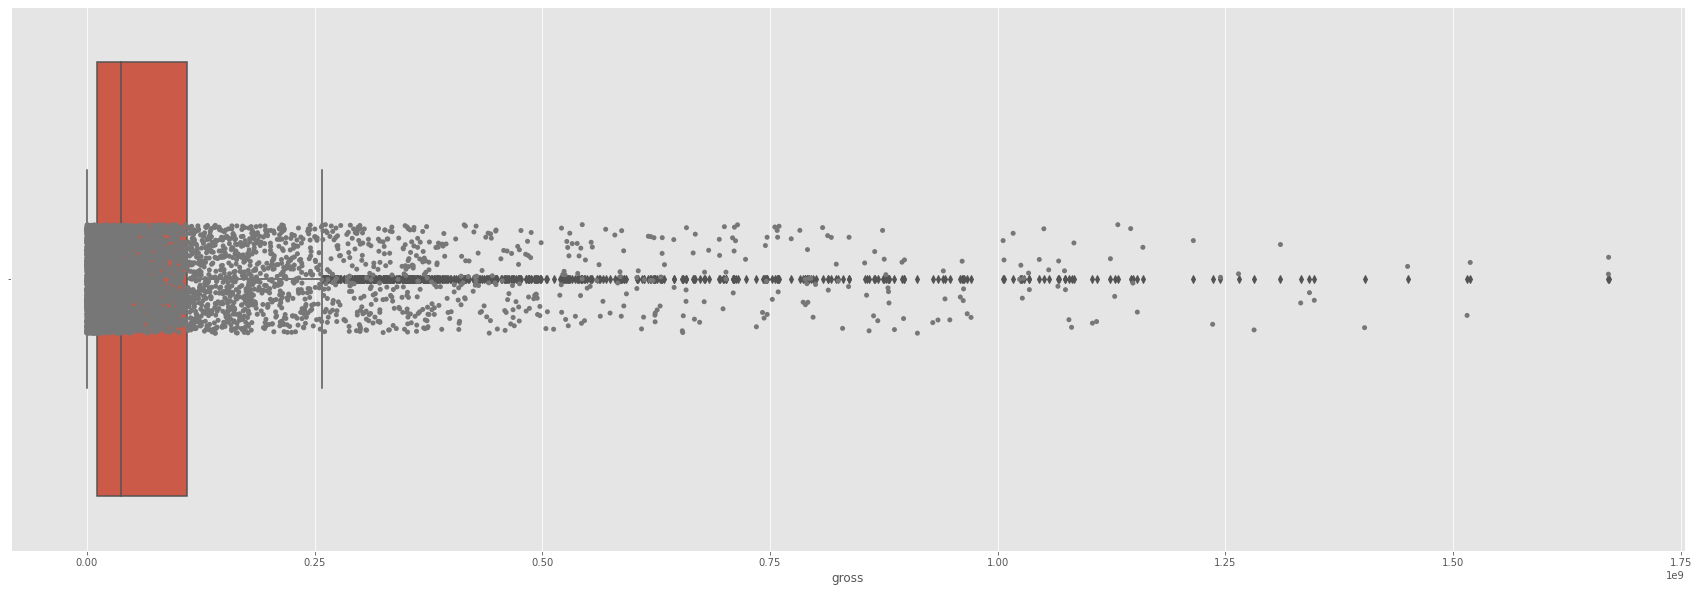

In [17]:
#Check again for gross
plt.figure(figsize=(30,10))
sns.boxplot(x='gross' , data=df)
sns.stripplot( x='gross',data=df, color="#777777")

In [18]:
df.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,runtime
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,146.0
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,124.0
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,88.0
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,98.0


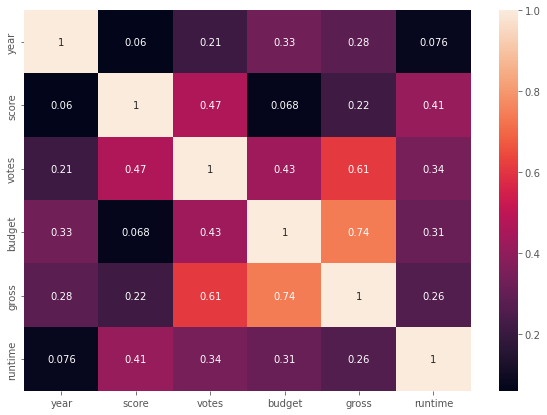

In [19]:
# Correlation between the variables
corr = df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True )

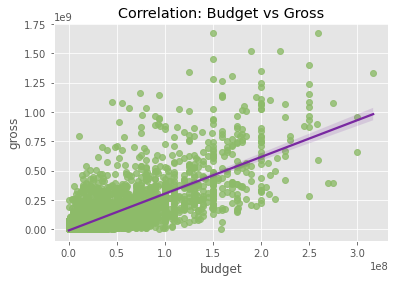

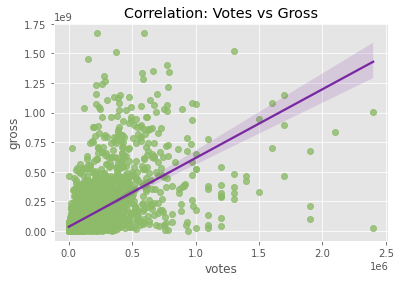

In [20]:
# Visualize correlations between budget and votes versus gross
sns.regplot(data=df, x='budget', y='gross', scatter_kws={"color": "#8dbb69"}, line_kws={"color": "#7928a1"}).set(title='Correlation: Budget vs Gross')
plt.show()

sns.regplot(data=df, x='votes', y='gross', scatter_kws={"color": "#8dbb69"}, line_kws={"color": "#7928a1"}).set(title='Correlation: Votes vs Gross')
plt.show()

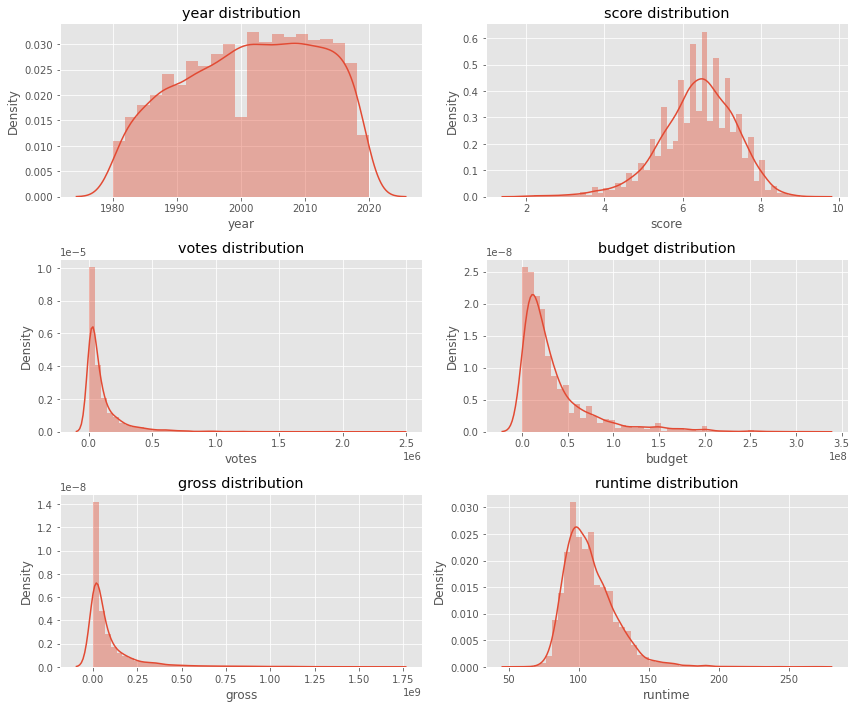

In [21]:
# Visualize the distribution of each variable.
plt.figure(figsize=(12,16))
for i, j in enumerate(df.describe().columns):
    plt.subplot(5,2, i+1)
    sns.distplot(x=df[j])
    plt.xlabel(j)
    plt.title('{} distribution'.format(j))
    # plt.subplots_adjust(wspace=.2, hspace=.5)
    plt.tight_layout()
plt.show()

In [22]:
# Keeping most recent values for columns 'director', 'writer', 'star'
df['director'].value_counts()

Woody Allen          33
Clint Eastwood       31
Steven Spielberg     27
Steven Soderbergh    23
Ron Howard           23
                     ..
Denise Di Novi        1
Chris Carter          1
Paul Miller           1
Bobcat Goldthwait     1
Peter Billingsley     1
Name: director, Length: 2106, dtype: int64

In [23]:
df['writer'].value_counts()

Woody Allen       32
Stephen King      29
John Hughes       20
Luc Besson        14
Joel Coen         13
                  ..
Angelina Jolie     1
André P. Brink     1
Steven Hager       1
Michael Moore      1
Karen Walton       1
Name: writer, Length: 3259, dtype: int64

In [24]:
df['star'].value_counts()

Nicolas Cage          40
Robert De Niro        38
Tom Hanks             38
Tom Cruise            34
Bruce Willis          34
                      ..
Mae Whitman            1
Michael J. Pollard     1
Jonathan Cherry        1
Tyrin Turner           1
Tony Danza             1
Name: star, Length: 1893, dtype: int64

In [25]:
m1 = df.director.map(df.director.value_counts()) < 20
df.director =  df.director.mask(m1, 'other')

m2 = df.writer.map(df.writer.value_counts()) < 10
df.writer =  df.writer.mask(m2, 'other')

m3 = df.star.map(df.star.value_counts()) < 25
df.star =  df.star.mask(m3, 'other')

In [26]:
df.director.value_counts()

other                5307
Woody Allen            33
Clint Eastwood         31
Steven Spielberg       27
Ridley Scott           23
Ron Howard             23
Steven Soderbergh      23
Joel Schumacher        20
Name: director, dtype: int64

In [27]:
df.writer.value_counts()

other                  5272
Woody Allen              32
Stephen King             29
John Hughes              20
Luc Besson               14
Joel Coen                13
Wes Craven               12
Michael Crichton         11
Quentin Tarantino        11
M. Night Shyamalan       11
Robert Rodriguez         11
David Mamet              11
Ehren Kruger             10
Kevin Smith              10
Leigh Whannell           10
William Shakespeare      10
Name: writer, dtype: int64

In [28]:
df.star.value_counts()

other                    4946
Nicolas Cage               40
Robert De Niro             38
Tom Hanks                  38
Tom Cruise                 34
Bruce Willis               34
Denzel Washington          33
Sylvester Stallone         32
Johnny Depp                31
Adam Sandler               28
Eddie Murphy               27
Kevin Costner              27
John Travolta              26
Harrison Ford              26
Arnold Schwarzenegger      26
Keanu Reeves               26
Mel Gibson                 25
Matt Damon                 25
Matthew McConaughey        25
Name: star, dtype: int64

#### Hide

In [29]:
# Encoding 'rating', 'genre', 'country'
enc=OneHotEncoder()
enc_df=pd.DataFrame(enc.fit_transform(df[['rating', 'genre', 'country', 'director', 'writer', 'star']]).toarray())

In [30]:
final_df = df.join(enc_df)

In [31]:
final_df.isna().sum()

name         0
rating       0
genre        0
year         0
score        0
          ... 
118       1657
119       1657
120       1657
121       1657
122       1657
Length: 136, dtype: int64

In [32]:
# Dropping lines with NaN values, which appeared after merge (need to understand why)
final_df.dropna(axis=0, inplace=True)
final_df.drop(labels = ['rating', 'genre', 'country', 'director', 'writer', 'star'], axis=1, inplace=True)

In [33]:
final_df.head(10)

,name,year,score,votes,budget,gross,runtime,0,1,2,...,113,114,115,116,117,118,119,120,121,122
0,The Shining,1980,8.4,927000.0,19000000.0,46998772.0,146.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,The Blue Lagoon,1980,5.8,65000.0,4500000.0,58853106.0,104.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Star Wars: Episode V - The Empire Strikes Back,1980,8.7,1200000.0,18000000.0,538375067.0,124.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Airplane!,1980,7.7,221000.0,3500000.0,83453539.0,88.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Caddyshack,1980,7.3,108000.0,6000000.0,39846344.0,98.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,Friday the 13th,1980,6.4,123000.0,550000.0,39754601.0,95.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,The Blues Brothers,1980,7.9,188000.0,27000000.0,115229890.0,133.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,Raging Bull,1980,8.2,330000.0,18000000.0,23402427.0,129.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,Superman II,1980,6.8,101000.0,54000000.0,108185706.0,127.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,The Long Riders,1980,7.0,10000.0,10000000.0,15795189.0,100.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [34]:
final_df.isna().sum()

name      0
year      0
score     0
votes     0
budget    0
         ..
118       0
119       0
120       0
121       0
122       0
Length: 130, dtype: int64

In [35]:
# Removing name 
# df = df.drop(labels =['name'] , axis=1)

### Prediction model

In [98]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.tree import ExtraTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Ridge

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer

In [32]:
df

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,runtime
0,The Shining,R,Drama,1980,8.4,927000.0,other,Stephen King,other,United Kingdom,19000000.0,4.699877e+07,146.0
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,other,other,other,United States,4500000.0,5.885311e+07,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,other,other,other,United States,18000000.0,5.383751e+08,124.0
3,Airplane!,PG,Comedy,1980,7.7,221000.0,other,other,other,United States,3500000.0,8.345354e+07,88.0
4,Caddyshack,R,Comedy,1980,7.3,108000.0,other,other,other,United States,6000000.0,3.984634e+07,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7651,The Call of the Wild,PG,Adventure,2020,6.8,42000.0,other,other,Harrison Ford,Canada,135000000.0,1.111055e+08,100.0
7652,The Eight Hundred,Not Rated,Action,2020,6.8,3700.0,other,other,other,China,80000000.0,4.614216e+08,149.0
7654,Star Trek First Frontier,unrated,Sci-Fi,2020,5.7,165.0,other,other,other,United States,370000.0,7.850054e+07,85.0
7658,Black Wall Street Burning,R,Drama,2020,6.6,35.0,other,other,other,United States,5000.0,7.850054e+07,78.0


In [39]:
X, y = df.drop(['name','rating'], axis = 1), df['rating']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [43]:
num = list(X_train.select_dtypes('number').columns)
cat = list(X_train.select_dtypes('category').columns)

model_scale = MinMaxScaler()
model_encoder = OneHotEncoder()
transformer = ColumnTransformer([('num',model_scale,num),
                                 ('cat',model_encoder,cat)])

#### KNeighborsClassifier

In [44]:
model_class = KNeighborsClassifier()
model_combined = make_pipeline(transformer, model_class)
model_combined_optimal = GridSearchCV(model_combined,
          param_grid = {'kneighborsclassifier__n_neighbors': np.arange(1,51,2)},
                                     n_jobs = -1, cv = 10, return_train_score=True)
model_combined_optimal.fit(X_train,y_train)
model_combined_optimal

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['year',
                                                                          'score',
                                                                          'votes',
                                                                          'budget',
                                                                          'gross',
                                                                          'runtime']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         [])])),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'kneighborsclassifier__n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])},
             return_train_score=True)

In [46]:
model_combined_optimal.best_params_

{'kneighborsclassifier__n_neighbors': 37}

In [47]:
model_combined_optimal.score(X_train,y_train)

0.5759854180906813

In [48]:
model_combined_optimal.score(X_test,y_test)

0.5701275045537341

In [45]:
Y_predict = model_combined_optimal.predict(X_train)
print(classification_report(y_train, Y_predict))

              precision    recall  f1-score   support

           G       1.00      0.02      0.04        88
       NC-17       0.00      0.00      0.00        11
   Not Rated       0.00      0.00      0.00        37
          PG       0.64      0.19      0.29       743
       PG-13       0.54      0.45      0.49      1413
           R       0.59      0.84      0.69      2071
     Unrated       0.00      0.00      0.00        12
           X       0.00      0.00      0.00         1
     unrated       0.00      0.00      0.00        13

    accuracy                           0.58      4389
   macro avg       0.31      0.17      0.17      4389
weighted avg       0.58      0.58      0.53      4389



In [49]:
Y_predict = model_combined_optimal.predict(X_test)
print(classification_report(y_test, Y_predict))

              precision    recall  f1-score   support

    Approved       0.00      0.00      0.00         1
           G       0.00      0.00      0.00        23
       NC-17       0.00      0.00      0.00         1
   Not Rated       0.00      0.00      0.00        11
          PG       0.54      0.16      0.25       175
       PG-13       0.51      0.43      0.47       318
           R       0.59      0.83      0.69       557
       TV-MA       0.00      0.00      0.00         2
     Unrated       0.00      0.00      0.00         6
     unrated       0.00      0.00      0.00         4

    accuracy                           0.57      1098
   macro avg       0.16      0.14      0.14      1098
weighted avg       0.53      0.57      0.53      1098



#### Tree

In [63]:
model_tree = DecisionTreeClassifier(random_state=42)
model_combined = make_pipeline(transformer, model_tree)
parameters = {'decisiontreeclassifier__criterion': ('gini','entropy'),
              'decisiontreeclassifier__max_depth': [5, 10, 20, 30, 50, 100,1000,2000], 
              'decisiontreeclassifier__min_samples_leaf': [1,2,4,8,20,40,80,100,200]}
scorer = metrics.make_scorer(balanced_accuracy_score)
model_combined_optimal = GridSearchCV(model_combined,
          param_grid = parameters, n_jobs = -1, cv = 10,  scoring=scorer, return_train_score=True)
model_combined_optimal = model_combined_optimal.fit(X_train, y_train)
best_model_tree = model_combined_optimal.best_estimator_
best_model_tree

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['year', 'score', 'votes',
                                                   'budget', 'gross',
                                                   'runtime']),
                                                 ('cat', OneHotEncoder(),
                                                  [])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=20, min_samples_leaf=4,
                                        random_state=42))])

In [64]:
Y_predict = best_model_tree.predict(X_train)
print(classification_report(y_train, Y_predict))

              precision    recall  f1-score   support

           G       0.64      0.61      0.62        88
       NC-17       0.00      0.00      0.00        11
   Not Rated       0.43      0.35      0.39        37
          PG       0.70      0.79      0.74       743
       PG-13       0.78      0.81      0.80      1413
           R       0.87      0.83      0.85      2071
     Unrated       0.75      0.25      0.38        12
           X       0.00      0.00      0.00         1
     unrated       0.00      0.00      0.00        13

    accuracy                           0.80      4389
   macro avg       0.46      0.41      0.42      4389
weighted avg       0.80      0.80      0.80      4389



In [65]:
Y_predict = best_model_tree.predict(X_test)
print(classification_report(y_test, Y_predict))

              precision    recall  f1-score   support

    Approved       0.00      0.00      0.00         1
           G       0.33      0.26      0.29        23
       NC-17       0.00      0.00      0.00         1
   Not Rated       0.00      0.00      0.00        11
          PG       0.37      0.47      0.41       175
       PG-13       0.41      0.46      0.43       318
           R       0.65      0.57      0.61       557
       TV-MA       0.00      0.00      0.00         2
     Unrated       0.00      0.00      0.00         6
     unrated       0.00      0.00      0.00         4

    accuracy                           0.50      1098
   macro avg       0.18      0.18      0.17      1098
weighted avg       0.51      0.50      0.50      1098



#### Logistic Regression

In [70]:
lr = LogisticRegression(penalty='none', max_iter=5000)
model_combined = make_pipeline(transformer, lr)
grid={"logisticregression__C":np.logspace(-3,3,7)}
scorer = metrics.make_scorer(balanced_accuracy_score)
clf = GridSearchCV(model_combined,
          param_grid = grid, n_jobs = -1, cv = 10,  scoring=scorer, return_train_score=True)
best_lr = clf.fit(X_train, y_train)

In [71]:
Y_predict = best_lr.predict(X_train)
print(classification_report(y_train, Y_predict))

              precision    recall  f1-score   support

           G       0.53      0.10      0.17        88
       NC-17       0.00      0.00      0.00        11
   Not Rated       0.50      0.03      0.05        37
          PG       0.50      0.15      0.24       743
       PG-13       0.54      0.38      0.45      1413
           R       0.56      0.86      0.68      2071
     Unrated       0.00      0.00      0.00        12
           X       0.00      0.00      0.00         1
     unrated       0.00      0.00      0.00        13

    accuracy                           0.56      4389
   macro avg       0.29      0.17      0.18      4389
weighted avg       0.54      0.56      0.51      4389



In [72]:
Y_predict = best_lr.predict(X_test)
print(classification_report(y_test, Y_predict))

              precision    recall  f1-score   support

    Approved       0.00      0.00      0.00         1
           G       1.00      0.17      0.30        23
       NC-17       0.00      0.00      0.00         1
   Not Rated       0.00      0.00      0.00        11
          PG       0.47      0.15      0.23       175
       PG-13       0.50      0.35      0.41       318
           R       0.59      0.86      0.70       557
       TV-MA       0.00      0.00      0.00         2
     Unrated       0.00      0.00      0.00         6
     unrated       0.00      0.00      0.00         4

    accuracy                           0.57      1098
   macro avg       0.26      0.15      0.16      1098
weighted avg       0.54      0.57      0.52      1098



#### AdaBoostClassifier

In [76]:
mod_ada = AdaBoostClassifier(DecisionTreeClassifier())
model_combined = make_pipeline(transformer, mod_ada)
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 30, num = 1)]
parameters = {'adaboostclassifier__n_estimators': n_estimators
             }
model_combined_optimal = GridSearchCV(model_combined,
          param_grid = parameters, n_jobs = -1, cv = 10,  scoring=scorer, return_train_score=True)
model_combined_optimal = model_combined_optimal.fit(X_train, y_train)
best_model_tree = model_combined_optimal.best_estimator_
best_model_tree

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['year', 'score', 'votes',
                                                   'budget', 'gross',
                                                   'runtime']),
                                                 ('cat', OneHotEncoder(),
                                                  [])])),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),
                                    n_estimators=1))])

In [77]:
Y_predict = best_model_tree.predict(X_train)
print(classification_report(y_train, Y_predict))

              precision    recall  f1-score   support

           G       1.00      1.00      1.00        88
       NC-17       1.00      1.00      1.00        11
   Not Rated       1.00      1.00      1.00        37
          PG       1.00      1.00      1.00       743
       PG-13       1.00      1.00      1.00      1413
           R       1.00      1.00      1.00      2071
     Unrated       1.00      1.00      1.00        12
           X       1.00      1.00      1.00         1
     unrated       1.00      1.00      1.00        13

    accuracy                           1.00      4389
   macro avg       1.00      1.00      1.00      4389
weighted avg       1.00      1.00      1.00      4389



In [78]:
Y_predict = best_model_tree.predict(X_test)
print(classification_report(y_test, Y_predict))

              precision    recall  f1-score   support

    Approved       0.00      0.00      0.00         1
           G       0.31      0.35      0.33        23
       NC-17       0.00      0.00      0.00         1
   Not Rated       0.00      0.00      0.00        11
          PG       0.34      0.37      0.36       175
       PG-13       0.42      0.48      0.45       318
           R       0.63      0.57      0.60       557
       TV-MA       0.00      0.00      0.00         2
     Unrated       0.00      0.00      0.00         6
           X       0.00      0.00      0.00         0
     unrated       0.00      0.00      0.00         4

    accuracy                           0.50      1098
   macro avg       0.15      0.16      0.16      1098
weighted avg       0.50      0.50      0.50      1098



#### Keeping only good features by intuition

In [171]:
X, y = df.drop(['name','rating', 'writer','star', 'director', 'country'], axis = 1), df['rating']

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [116]:
num = list(X_train.select_dtypes('number').columns)
cat = list(X_train.select_dtypes('category').columns)

model_scale = MinMaxScaler()
model_encoder = OneHotEncoder()
transformer = ColumnTransformer([('num',model_scale,num),
                                 ('cat',model_encoder,cat)])

lr = LogisticRegression(penalty='none', max_iter=5000)
model_combined = make_pipeline(transformer, lr)
grid={"logisticregression__C":np.logspace(-3,3,7)}
scorer = metrics.make_scorer(balanced_accuracy_score)
clf = GridSearchCV(model_combined,
          param_grid = grid, n_jobs = -1, cv = 10,  scoring=scorer, return_train_score=True)
best_lr = clf.fit(X_train, y_train)

In [117]:
Y_predict = best_lr.predict(X_train)
print(classification_report(y_train, Y_predict))

              precision    recall  f1-score   support

    Approved       1.00      1.00      1.00         1
           G       0.63      0.22      0.32        88
       NC-17       0.00      0.00      0.00        12
   Not Rated       0.00      0.00      0.00        38
          PG       0.51      0.12      0.20       736
       PG-13       0.53      0.37      0.44      1399
           R       0.56      0.86      0.68      2087
       TV-MA       0.00      0.00      0.00         1
     Unrated       0.00      0.00      0.00        14
           X       0.00      0.00      0.00         1
     unrated       0.00      0.00      0.00        12

    accuracy                           0.55      4389
   macro avg       0.29      0.23      0.24      4389
weighted avg       0.54      0.55      0.50      4389



In [118]:
Y_predict = best_lr.predict(X_test)
print(classification_report(y_test, Y_predict))

              precision    recall  f1-score   support

    Approved       0.00      0.00      0.00         0
           G       0.57      0.17      0.27        23
   Not Rated       0.00      0.00      0.00        10
          PG       0.46      0.12      0.19       182
       PG-13       0.50      0.36      0.42       332
           R       0.58      0.86      0.69       541
       TV-MA       0.00      0.00      0.00         1
     Unrated       0.00      0.00      0.00         4
     unrated       0.00      0.00      0.00         5

    accuracy                           0.56      1098
   macro avg       0.23      0.17      0.17      1098
weighted avg       0.52      0.56      0.50      1098



In [175]:
## 2

In [174]:
mod_ada = AdaBoostClassifier(DecisionTreeClassifier())
model_combined = make_pipeline(transformer, mod_ada)
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 30, num = 1)]
parameters = {'adaboostclassifier__n_estimators': n_estimators
             }
model_combined_optimal = GridSearchCV(model_combined,
          param_grid = parameters, n_jobs = -1, cv = 10,  scoring=scorer, return_train_score=True)
model_combined_optimal = model_combined_optimal.fit(X_train, y_train)
best_model_tree = model_combined_optimal.best_estimator_
best_model_tree

Y_predict = best_model_tree.predict(X_train)
print(classification_report(y_train, Y_predict))

Y_predict = best_model_tree.predict(X_test)
print(classification_report(y_test, Y_predict))

              precision    recall  f1-score   support

    Approved       1.00      1.00      1.00         1
           G       0.78      0.97      0.86        90
       NC-17       0.77      1.00      0.87        10
   Not Rated       0.91      0.97      0.94        40
          PG       0.83      0.96      0.89       721
       PG-13       0.90      0.93      0.91      1368
           R       0.97      0.90      0.93      2130
       TV-MA       1.00      1.00      1.00         1
     Unrated       1.00      0.77      0.87        13
     unrated       1.00      0.93      0.97        15

    accuracy                           0.92      4389
   macro avg       0.92      0.94      0.92      4389
weighted avg       0.92      0.92      0.92      4389

              precision    recall  f1-score   support

           G       0.06      0.05      0.05        21
       NC-17       0.00      0.00      0.00         2
   Not Rated       0.00      0.00      0.00         8
          PG       0.23 

#### Regression

In [162]:
X, y = df.drop(['name','gross', 'year', 'score', 'runtime'], axis = 1), df['gross'] # removed low correlated ones

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [164]:
num = list(X_train.select_dtypes('number').columns)
cat = list(X_train.select_dtypes('category').columns)

model_scale = MinMaxScaler()
model_encoder = OneHotEncoder()
transformer = ColumnTransformer([('num',model_scale,num),
                                 ('cat',model_encoder,cat)])

mod_ada_2 = AdaBoostRegressor(ExtraTreeRegressor()) # base_estimator=None by default
model_combined = make_pipeline(transformer, mod_ada_2)

n_estimators = [int(x) for x in np.linspace(start = 1, stop = 30, num = 1)]
parameters = {'adaboostregressor__n_estimators': n_estimators
             }
gridCV= GridSearchCV(mod_ada_2, parameters, cv=10)
model_combined_optimal = GridSearchCV(model_combined,
          param_grid = parameters, n_jobs = -1, cv = 10, return_train_score=True)
model_combined_optimal = model_combined_optimal.fit(X_train, y_train)
best_model_extra = model_combined_optimal.best_estimator_
best_model_extra

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['votes', 'budget']),
                                                 ('cat', OneHotEncoder(),
                                                  [])])),
                ('adaboostregressor',
                 AdaBoostRegressor(base_estimator=ExtraTreeRegressor(),
                                   n_estimators=1))])

In [165]:
best_model_extra.score(X_train,y_train)

0.7640779206455888

In [166]:
best_model_extra.score(X_test,y_test)

0.3942598393775044

#### Ridge regression

In [167]:
model_scale = MinMaxScaler()
model_ridge = Ridge()
model_encoder = OneHotEncoder()
num = list(X_train.select_dtypes('number').columns)
cat = list(X_train.select_dtypes('category').columns)
transformer = ColumnTransformer([('num',model_scale,num),
                                 ('cat',model_encoder,cat)])
model_combined = make_pipeline(transformer, model_ridge)
alpha_grid = np.linspace(0.0001, 50, 50)
model_combined_optimal = GridSearchCV(model_combined, 
                             param_grid = {'ridge__alpha': np.linspace(0.0001, 50, 50)})
model_combined_optimal.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['votes',
                                                                          'budget']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         [])])),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': array([1.00000000e-04, 1.02050612e+00, 2.04091224e+00, 3.06131837e+00,
       4.08172449e+00, 5.10213061e+00, 6.12253673e+00, 7.14294286e+00,
       8.16334898e+...
       2.44898469e+01, 2.55102531e+01, 2.65306592e+01, 2.75510653e+01,
       2.85714714e+01, 2.95918776e+01, 3.06122837e+01, 3.16326898e+01,
       3.26530959e+01, 3.36735020e+01, 3.46939082e+01, 3.57143143e+01,
       3.67347204e+01, 3.77551265e+01, 3.87755327e+01, 3.97959388e+01,
       4.08163449e+01, 4.18367510e+01, 4.28571571e+01, 4.38775633e+01,
       4.48979694e+01, 4.59183755e+01, 4.69387816e+01, 4.79591878e+01,
       4.89795939e+01, 5.00000000e+01])})

In [168]:
model_combined_optimal.best_params_

{'ridge__alpha': 0.0001}

In [169]:
model_combined_optimal.score(X_train,y_train)

0.6602831188849183

In [170]:
model_combined_optimal.score(X_test,y_test)

0.6255164323129226

#### Ridge regression reduced params

In [153]:
X, y = df.drop(['name','gross', 'year', 'score', 'runtime', 'writer'], axis = 1), df['gross'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [158]:
model_scale = MinMaxScaler()
model_ridge = Ridge()
model_encoder = OneHotEncoder()
num = list(X_train.select_dtypes('number').columns)
cat = list(X_train.select_dtypes('category').columns)
transformer = ColumnTransformer([('num',model_scale,num),
                                 ('cat',model_encoder,cat)])
model_combined = make_pipeline(transformer, model_ridge)
alpha_grid = np.linspace(0.0001, 50, 50)
model_combined_optimal = GridSearchCV(model_combined, 
                             param_grid = {'ridge__alpha': np.linspace(0.0001, 1, 50)})
model_combined_optimal.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['votes',
                                                                          'budget']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         [])])),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': array([1.00000000e-04, 2.05061224e-02, 4.09122449e-02, 6.13183673e-02,
       8.17244898e-02, 1.02130612e-01, 1.22536735e-01, 1.42942857e-01,
       1.63348980e-...
       4.89846939e-01, 5.10253061e-01, 5.30659184e-01, 5.51065306e-01,
       5.71471429e-01, 5.91877551e-01, 6.12283673e-01, 6.32689796e-01,
       6.53095918e-01, 6.73502041e-01, 6.93908163e-01, 7.14314286e-01,
       7.34720408e-01, 7.55126531e-01, 7.75532653e-01, 7.95938776e-01,
       8.16344898e-01, 8.36751020e-01, 8.57157143e-01, 8.77563265e-01,
       8.97969388e-01, 9.18375510e-01, 9.38781633e-01, 9.59187755e-01,
       9.79593878e-01, 1.00000000e+00])})

In [159]:
model_combined_optimal.best_params_

{'ridge__alpha': 1.0}

In [160]:
model_combined_optimal.score(X_train,y_train)

0.6523624040974342

In [161]:
model_combined_optimal.score(X_test,y_test)

0.6568750336607577